In [1]:
import pandas as pd
import numpy as np
import subprocess
import seaborn as sns
import matplotlib.pyplot as plt

In [158]:
%%bash
for region in $( cut -f2 ../popmap.txt | sort | uniq ); do
    awk -v var="${region}" '$2==var' ../popmap.txt | cut -f1 > ../${region}.txt
done

In [177]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 0.8 --min-alleles 2 --max-alleles 2 \
    --maf 0.05 --thin 10000 --remove-indels --remove-indv A131 \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/kinfilter

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--min-alleles 2
	--minGQ 20
	--thin 10000
	--minQ 20
	--max-missing 0.8
	--out ../calls/kinfilter
	--recode
	--remove-indels
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed
	--remove-indv A131

Using zlib version: 1.2.11
Excluding individuals in 'exclude' list
After filtering, kept 181 out of 182 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 25610 out of a possible 11236881 Sites
Run Time = 1243.00 seconds


In [2]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/kinfilter.recode.vcf --make-king-table --allow-extra-chr --out ../kinfilter

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../kinfilter.log.
Options in effect:
  --allow-extra-chr
  --make-king-table
  --out ../kinfilter
  --vcf ../calls/kinfilter.recode.vcf

Start time: Sat Dec 30 00:36:55 2023
128814 MiB RAM detected; reserving 64407 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 25610 variants scanned.
--vcf: ../kinfilter-temporary.pgen + ../kinfilter-temporary.pvar +
../kinfilter-temporary.psam written.
181 samples (0 females, 0 males, 181 ambiguous; 181 founders) loaded from
../kinfilter-temporary.psam.
25610 variants loaded from ../kinfilter-temporary.pvar.
Note: No phenotype data present.
--make-king-t

In [4]:
relatedness = pd.read_csv("../kinfilter.kin0", sep = "\t")

In [7]:
tests = ["A22243", "A22158", "A22129", "A22117", "A22166"]
for i in tests:
    print(relatedness[relatedness["#ID1"] == i].sort_values("KINSHIP").tail(3))
    print(relatedness[relatedness["ID2"] == i].sort_values("KINSHIP").tail(3))

        #ID1     ID2   NSNP    HETHET      IBS0   KINSHIP
4174  A22243  A22228  23319  0.144131  0.028003  0.138893
4126  A22243  A22089  23115  0.162362  0.014752  0.213678
4170  A22243  A22224  23163  0.170315  0.010750  0.237274
                                                    #ID1     ID2   NSNP  \
4651                                          SRR7235981  A22243  14933   
16201  /storage/home/nsl5160/scratch/darpa/mapped/201...  A22243  18275   
7717                                         AP29_kenkel  A22243  13212   

         HETHET      IBS0   KINSHIP  
4651   0.149066  0.019956  0.164163  
16201  0.175595  0.022326  0.181575  
7717   0.190282  0.007493  0.200979  
        #ID1     ID2   NSNP    HETHET      IBS0   KINSHIP
2216  A22158  A22007  24176  0.159993  0.023288  0.169247
2214  A22158  A22003  24097  0.162136  0.023073  0.171144
2253  A22158  A22116  24162  0.168239  0.019162  0.205545
             #ID1     ID2   NSNP    HETHET      IBS0   KINSHIP
3808       A22239  A

In [185]:
%%bash
source ~/.bashrc
conda activate ipyrad
bcftools +tag2tag ../calls/kinfilter.recode.vcf \
    -- --pl-to-gl > ../calls/kinfilter_gl.recode.vcf

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [196]:
%%bash
source ~/.bashrc
conda activate ipyrad
bioawk -c fastx '{ print $name, length($seq) }' < ../references/apal_and_sym.fa | sort -rhk2,2 | head -14 | cut -f1

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
Apal_hic_scaffold_4,Apal_hic_scaffold_10,Apal_hic_scaffold_2,Apal_hic_scaffold_20,Apal_hic_scaffold_17,Apal_hic_scaffold_31,Apal_hic_scaffold_35,Apal_hic_scaffold_15,Apal_hic_scaffold_6,Apal_hic_scaffold_30,Apal_hic_scaffold_5,Apal_hic_scaffold_1,Apal_hic_scaffold_21,Apal_hic_scaffold_11,

In [206]:
%%bash
source ~/.bashrc
conda activate ipyrad
for i in $( bioawk -c fastx '{ print $name, length($seq) }' < ../references/apal_and_sym.fa | sort -rhk2,2 | head -14 | cut -f1 ); do
    vcftools --vcf ../calls/kinfilter_gl.recode.vcf \
        --out ngsadmix_in_${i} --BEAGLE-GL \
        --chr ${i}
done

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/kinfilter_gl.recode.vcf
	--chr Apal_hic_scaffold_4
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ngsadmix_in_Apal_hic_scaffold_4

After filtering, kept 181 out of 181 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 2487 out of a possible 25610 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/kinfilter_gl.recode.vcf
	--chr Apal_hic_scaffold_10
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ngsadmix_in_Apal_hic_scaffold_10

After filtering, kept 181 out of 181 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 2410 out of a possible 25610 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as 

	--chr Apal_hic_scaffold_15
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ngsadmix_in_Apal_hic_scaffold_15

After filtering, kept 181 out of 181 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 1656 out of a possible 25610 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/kinfilter_gl.recode.vcf
	--chr Apal_hic_scaffold_6
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	--out ngsadmix_in_Apal_hic_scaffold_6

After filtering, kept 181 out of 181 Individuals
Outputting GLs in BEAGLE Genotype Likelihood format (bi-allelic SNPs with GL tags only)
After filtering, kept 1458 out of a possible 25610 Sites
Run Time = 1.00 seconds

VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf ../calls/kinfilter_gl.recode.vcf
	--chr Apal_hic_scaffold_30
	--max-alleles 2
	--min-alleles 2
	--BEAGLE-GL
	

In [210]:
%%bash
source ~/.bashrc
conda activate ipyrad
head -1 ./ngsadmix_in_Apal_hic_scaffold_1.BEAGLE.GL > ../ngsadmix_in.BEAGLE.GL
for i in $( bioawk -c fastx '{ print $name, length($seq) }' < ../references/apal_and_sym.fa | sort -rhk2,2 | head -14 | cut -f1 ); do
    tail -n+2 ./ngsadmix_in_${i}.BEAGLE.GL >> ../ngsadmix_in.BEAGLE.GL
done

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [216]:
for k in [1,2,3,4,5,6,7,8,9,10]:
    for rep in [1,2,3,4,5,6]:
        task = "ngsadmix"
        mem = "64"
        cpus = "8"
        infile = '../ngsadmix_in.BEAGLE.GL'
        outpath = '../ngsadmix_relatedness'
        k = str(k)
        rep = str(rep)
        outprefix = 'relatedness'
        subprocess.run(["sbatch --mem=" + mem + "g --ntasks=" + 
             cpus + " ../" + task + ".sh " + 
             outpath + " " + infile + " " + k + " " + rep + " " + outprefix], shell=True)

sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832901


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832902


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832903


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832904


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832905


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832906
Submitted batch job 6832907


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832908
Submitted batch job 6832909


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832910
Submitted batch job 6832911


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832912
Submitted batch job 6832913


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832914


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832915


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832916
Submitted batch job 6832917


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832918


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832919
Submitted batch job 6832920


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832921
Submitted batch job 6832922


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832923


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832924
Submitted batch job 6832925


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832926
Submitted batch job 6832927


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832928


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832929
Submitted batch job 6832930


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832931
Submitted batch job 6832932
Submitted batch job 6832933
Submitted batch job 6832934


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832935
Submitted batch job 6832936
Submitted batch job 6832937
Submitted batch job 6832938


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832939
Submitted batch job 6832940


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832941
Submitted batch job 6832942


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832943


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832944


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832945
Submitted batch job 6832946


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832947


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832948
Submitted batch job 6832949


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832950
Submitted batch job 6832951


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832952


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832953
Submitted batch job 6832954


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832955
Submitted batch job 6832956


sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832957


sbatch: slurm_job_submit: No account set, using default acct: open
sbatch: slurm_job_submit: No account set, using default acct: open


Submitted batch job 6832958
Submitted batch job 6832959
Submitted batch job 6832960


sbatch: slurm_job_submit: No account set, using default acct: open


In [224]:
%%bash
cd ../ngsadmix_relatedness/
echo -e "k\tbestlike" > ngsadmix_kvals.tsv
for k in 1 2 3 4 5 6 7 8 9 10; do
    for rep in 1 2 3 4 5 6; do
        VAR=$( cat relatedness_${k}_${rep}.log | grep "best like" | cut -d"=" -f2 | cut -d" " -f1 )
        echo -e "${k}\t${VAR}" >> ngsadmix_kvals.tsv
    done
done

<Axes: >

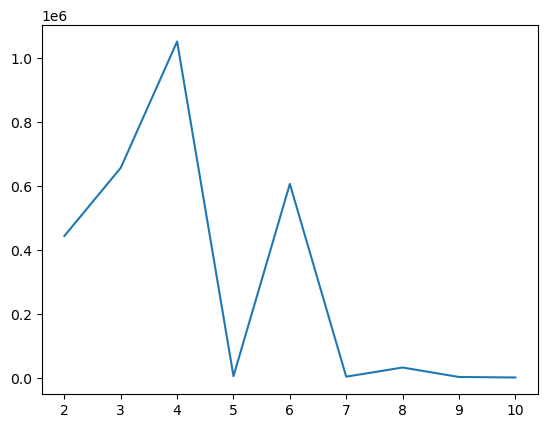

In [226]:
deltak = pd.read_csv("../ngsadmix_relatedness/ngsadmix_kvals.tsv", 
            sep = "\t")
deltak["bestlike"] = deltak["bestlike"].abs()
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10]
deltak_val = []
for k in ks:
    deltak_val = deltak_val + [np.mean(deltak["bestlike"][deltak["k"] == k])/np.std(deltak["bestlike"][deltak["k"] == k])]
plt.figure()
sns.lineplot(x = ks, y = deltak_val)

In [227]:
!head -100000 ../calls/kinfilter_gl.recode.vcf | grep "^#" | tail -1 | cut -f10- | tr "\t" "\n" > ../ngsadmix_relatedness/sample_list.txt

In [236]:
%%bash
cat ../ngsadmix_in.BEAGLE.GL \
        | /storage/group/ibb3/default/orbicella_popgen/maf_beagle_ngsadmix/maf_beagle 0.05 2> test_log.txt \
        | gzip -c > ../ngsadmix_in_maf05.beagle.gz

In [ ]:
%%bash
source ~/.bashrc
conda activate angsd
/storage/group/ibb3/default/orbicella_popgen/NGSremix/src/NGSremix \
    -beagle ../ngsadmix_in_maf05.beagle.gz \
    -fname ../ngsadmix_relatedness/relatedness_4_1.fopt.gz \
    -qname ../ngsadmix_relatedness/relatedness_4_1.qopt \
    -seed 420 -o ../ngsadmix_relatedness/apal_relatedness

/storage/group/ibb3/default/orbicella_popgen/NGSremix/src/NGSremix -beagle ../ngsadmix_in_maf05.beagle.gz -fname ../ngsadmix_relatedness/relatedness_4_1.fopt.gz -qname ../ngsadmix_relatedness/relatedness_4_1.qopt -seed 420 -o ../ngsadmix_relatedness/apal_relatedness 
	-> Seed is: 420
	-> Beagle - Reading from: ../ngsadmix_in_maf05.beagle.gz
	-> Beagle - 23985 sites and 181 nInd processed
	-> Beagle - Transpose from 23985 X 181*3 to 181 X 23985*3


	-> 180/181 paired ancestries estimated


In [255]:
samples = pd.read_csv("../ngsadmix_relatedness/sample_list.txt", header = None, names = ["Sample1"])
samples = samples.reset_index(drop=False)
samples["Sample2"] = samples["Sample1"]
samples["ind1"] = samples["index"]
samples["ind2"] = samples["index"]

In [256]:
samples

,index,Sample1,Sample2,ind1,ind2
0,0,A21999,A21999,0,0
1,1,A22001,A22001,1,1
2,2,A22002,A22002,2,2
3,3,A22003,A22003,3,3
4,4,A22006,A22006,4,4
...,...,...,...,...,...
176,176,/storage/home/nsl5160/scratch/darpa/mapped/201...,/storage/home/nsl5160/scratch/darpa/mapped/201...,176,176
177,177,/storage/home/nsl5160/scratch/darpa/mapped/201...,/storage/home/nsl5160/scratch/darpa/mapped/201...,177,177
178,178,/storage/home/nsl5160/scratch/darpa/mapped/201...,/storage/home/nsl5160/scratch/darpa/mapped/201...,178,178
179,179,/storage/home/nsl5160/scratch/darpa/mapped/201...,/storage/home/nsl5160/scratch/darpa/mapped/201...,179,179


In [242]:
relatedness = pd.read_csv("../ngsadmix_relatedness/apal_relatedness", sep = "\t")
relatedness["theta"] = ( relatedness["k1"] / 2 ) + ( relatedness["k2"] / 2 )

/tmp/ipykernel_3015661/1241404558.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(relatedness["theta"])


<Axes: xlabel='theta', ylabel='Density'>

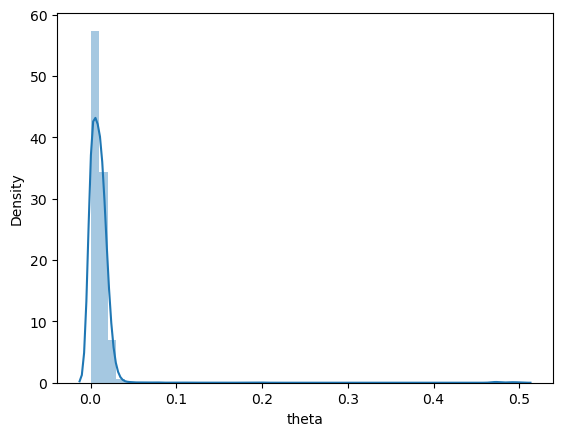

In [248]:
sns.distplot(relatedness["theta"])

In [258]:
relatedness = relatedness.merge(samples[["Sample1", "ind1"]], on = "ind1", how = "left")
relatedness = relatedness.merge(samples[["Sample2", "ind2"]], on = "ind2", how = "left")

In [259]:
relatedness.sort_values("theta").tail(60)

,ind1,ind2,k0,k1,k2,nIter,theta,Sample1,Sample2
9678,66,125,0.884703,0.029265,0.086032,68.0,0.057648,A22152,AP30_kenkel
8926,60,78,0.879342,0.059282,0.061376,44.0,0.060329,A22144,A22227
9865,68,85,0.878735,0.000163,0.121101,59.0,0.060632,A22159,A22237
2990,18,85,0.875857,0.059522,0.064621,38.0,0.062072,A22068,A22237
9680,66,127,0.874781,0.026126,0.099093,62.0,0.062609,A22152,AP55_kenkel
9679,66,126,0.866599,0.040950,0.092451,50.0,0.066700,A22152,AP54_kenkel
3029,18,124,0.852731,0.103234,0.044035,38.0,0.073635,A22068,AP29_kenkel
3905,24,43,0.851257,0.084395,0.064349,38.0,0.074372,A22079,A22117
2983,18,78,0.850213,0.061926,0.087861,44.0,0.074894,A22068,A22227
2927,18,22,0.841973,0.072327,0.085700,44.0,0.079014,A22068,A22076


In [1]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/kinfilter.recode.vcf --king-cutoff 0.25 --allow-extra-chr

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink2.log.
Options in effect:
  --allow-extra-chr
  --king-cutoff 0.25
  --vcf ../calls/kinfilter.recode.vcf

Start time: Tue Jan 16 13:40:59 2024
128802 MiB RAM detected; reserving 64401 MiB for main workspace.
Using up to 24 threads (change this with --threads).
--vcf: 25610 variants scanned.
--vcf: plink2-temporary.pgen + plink2-temporary.pvar + plink2-temporary.psam
written.
181 samples (0 females, 0 males, 181 ambiguous; 181 founders) loaded from
plink2-temporary.psam.
25610 variants loaded from plink2-temporary.pvar.
Note: No phenotype data present.
--king-cutoff pass 1/1: Scanning for rare variants... done.
0 variant

In [178]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/kinfilter.recode.vcf --make-king-table --allow-extra-chr

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink2.log.
Options in effect:
  --allow-extra-chr
  --make-king-table
  --vcf ../calls/kinfilter.recode.vcf

Start time: Mon Nov  6 14:48:50 2023
385427 MiB RAM detected; reserving 192713 MiB for main workspace.
Using up to 48 threads (change this with --threads).
--vcf: 25610 variants scanned.
--vcf: plink2-temporary.pgen + plink2-temporary.pvar + plink2-temporary.psam
written.
181 samples (0 females, 0 males, 181 ambiguous; 181 founders) loaded from
plink2-temporary.psam.
25610 variants loaded from plink2-temporary.pvar.
Note: No phenotype data present.
--make-king-table pass 1/1: Scanning for rare variants... done.
0 var

In [2]:
relate = pd.read_csv("plink2.kin0", sep = "\t")

In [267]:
relate[relate["#ID1"].str.contains("^DR2")].sort_values("KINSHIP")

,#ID1,ID2,NSNP,HETHET,IBS0,KINSHIP
10423,DR2_kenkel,AP55_kenkel,24920,0.081461,0.092336,-0.477150
10394,DR2_kenkel,SRR7235983,25338,0.099968,0.057424,-0.048008
10433,DR2_kenkel,Apal-005_kenkel,24984,0.116715,0.059798,-0.006159
10415,DR2_kenkel,SRR12363330,24932,0.119204,0.053505,-0.001334
10334,DR2_kenkel,A22098,24900,0.122008,0.058353,-0.001002
...,...,...,...,...,...,...
10402,DR2_kenkel,SRR7236003,22176,0.128743,0.035805,0.097988
10435,DR2_kenkel,DR1_kenkel,25090,0.132124,0.035831,0.100007
10393,DR2_kenkel,SRR7235982,21364,0.133964,0.035340,0.100092
10420,DR2_kenkel,AP29_kenkel,13947,0.173227,0.020721,0.114419


In [266]:
relate[relate["#ID1"].str.contains("^DR1")].sort_values("KINSHIP")

,#ID1,ID2,NSNP,HETHET,IBS0,KINSHIP
9718,DR1_kenkel,AP55_kenkel,24762,0.078871,0.096802,-0.502805
9689,DR1_kenkel,SRR7235983,25173,0.098558,0.058436,-0.044636
9728,DR1_kenkel,Apal-005_kenkel,24826,0.114316,0.064126,-0.034668
9709,DR1_kenkel,SRR7236020,24511,0.113826,0.058137,-0.020723
9652,DR1_kenkel,A22146,24703,0.119581,0.058495,-0.020704
...,...,...,...,...,...,...
9697,DR1_kenkel,SRR7236003,22057,0.122773,0.034683,0.086115
9696,DR1_kenkel,SRR7236002,22678,0.118838,0.034968,0.088714
9700,DR1_kenkel,SRR7236009,22183,0.117658,0.033945,0.090074
9715,DR1_kenkel,AP29_kenkel,13874,0.166066,0.018163,0.106263


/tmp/ipykernel_3015661/1754274878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(relate["KINSHIP"])


<Axes: xlabel='KINSHIP', ylabel='Density'>

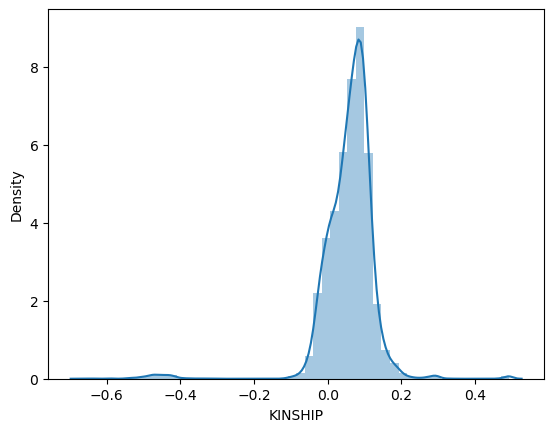

In [180]:
sns.distplot(relate["KINSHIP"])

In [7]:
relate["#ID1"][15266]

'/storage/home/nsl5160/scratch/darpa/mapped/20148.bam'

In [3]:
relate.sort_values("KINSHIP").tail(50)

,#ID1,ID2,NSNP,HETHET,IBS0,KINSHIP
8733,AP79_kenkel,A22239,22969,0.197875,0.000044,0.294051
9139,AP91_kenkel,SRR7235979,21805,0.186333,0.000183,0.294089
8651,AP79_kenkel,A22007,22941,0.198378,0.000044,0.294315
8390,AP66_kenkel,A22007,24309,0.197375,0.000699,0.294378
8646,AP79_kenkel,A21999,23009,0.198835,0.000043,0.294564
8387,AP66_kenkel,A22002,24410,0.197911,0.000655,0.294707
7580,AP14_kenkel,A22226,22507,0.187231,0.000267,0.294916
8648,AP79_kenkel,A22002,23024,0.199444,0.000087,0.295212
8775,AP79_kenkel,AP63_kenkel,23182,0.220559,0.010094,0.295479
8388,AP66_kenkel,A22003,24238,0.198531,0.000660,0.295970


In [7]:
print(relate["#ID1"][16023], relate["ID2"][16023])
print(relate["#ID1"][16141], relate["ID2"][16141])
print(relate["#ID1"][15266], relate["ID2"][15266])
print(relate["#ID1"][15642], relate["ID2"][15642])

/storage/home/nsl5160/scratch/darpa/mapped/20155.bam A22249
/storage/home/nsl5160/scratch/darpa/mapped/20156.bam A22089
/storage/home/nsl5160/scratch/darpa/mapped/20148.bam A22103
/storage/home/nsl5160/scratch/darpa/mapped/20153.bam A22152


The default PLINK implementation chose to remove the A22089 in favor of its sibling which has less missing data. However, we need to preserve this sample because we need to use the same clone sequenced with HiFi data for read-backed phasing. So we'll drop sample A22224 and add in A22089 to the "keep" list:

In [108]:
!grep -v "A22224" plink2.king.cutoff.in.id > keep_ids.txt ; echo "A22089" >> keep_ids.txt

In [182]:
!cat  keep_ids.txt

#IID
A22036
A22037
A22042
A22048
A22054
A22055
A22064
A22065
A22066
A22067
A22068
A22073
A22076
A22077
A22079
A22080
A22081
A22084
A22085
A22086
A22087
A22090
A22091
A22094
A22095
A22096
A22097
A22098
A22101
A22102
A22103
A22116
A22117
A22118
A22120
A22123
A22124
A22125
A22126
A22129
A22130
A22132
A22133
A22135
A22137
A22139
A22140
A22142
A22143
A22144
A22146
A22148
A22149
A22150
A22151
A22152
A22158
A22159
A22160
A22165
A22166
A22225
A22226
A22227
A22228
A22230
A22231
A22233
A22234
A22236
A22237
A22238
A22240
A22241
A22242
A22243
A22249
A13414
SRR7235980
SRR7235982
SRR7235983
SRR7235984
SRR7235985
SRR7235986
SRR7235987
SRR7235988
SRR7236001
SRR7236002
SRR7236003
SRR7236007
SRR7236008
SRR7236009
SRR7236010
SRR7236011
SRR7236012
SRR7236015
SRR7236016
SRR7236017
SRR7236018
SRR7236019
SRR7236020
SRR12363330
SRR12363331
SRR12363332
AP30_kenkel
AP55_kenkel
AP56_kenkel
AP66_kenkel
AP75_kenkel
AP86_kenkel
AP91_kenkel
AP327_kenkel
Apal-005_kenkel
DR1_kenkel
J1_kenkel
Apal-047_kenkel
DR2_kenkel

We definitely need to keep the HiFi samples as these are our read-backed phasing seeds for ShapeIt4. So we'll start by dropping samples that are in the sib-clone range and then automate the dropping process for the rest of the samples (Plink2 prioritizes samples with less missing data, which could be the HiFi samples):

In [45]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 1.0 --min-alleles 2 --max-alleles 2 \
    --maf 0.05 --thin 20000 --remove-indv A22152 \
    --remove-indv A22103 --remove-indv A22089 \
    --remove-indv A22249 --remove-indv A22224 \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/kinfilter

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--min-alleles 2
	--minGQ 20
	--thin 20000
	--minQ 20
	--max-missing 1
	--out ../calls/kinfilter
	--recode
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed
	--remove-indv A22089
	--remove-indv A22103
	--remove-indv A22152
	--remove-indv A22224
	--remove-indv A22249

Using zlib version: 1.2.11
Excluding individuals in 'exclude' list
After filtering, kept 95 out of 100 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 12948 out of a possible 9962937 Sites
Run Time = 756.00 seconds


In [46]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/kinfilter.recode.vcf --make-king-table --allow-extra-chr

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink2.log.
Options in effect:
  --allow-extra-chr
  --make-king-table
  --vcf ../calls/kinfilter.recode.vcf

Start time: Fri Aug 25 11:20:53 2023
515300 MiB RAM detected; reserving 257650 MiB for main workspace.
Using up to 48 threads (change this with --threads).
--vcf: 12948 variants scanned.
--vcf: plink2-temporary.pgen + plink2-temporary.pvar + plink2-temporary.psam
written.
95 samples (0 females, 0 males, 95 ambiguous; 95 founders) loaded from
plink2-temporary.psam.
12948 variants loaded from plink2-temporary.pvar.
Note: No phenotype data present.
--make-king-table pass 1/1: Scanning for rare variants... done.
0 varian

In [47]:
relate = pd.read_csv("plink2.kin0", sep = "\t")

/tmp/ipykernel_1886521/1754274878.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(relate["KINSHIP"])


<Axes: xlabel='KINSHIP', ylabel='Density'>

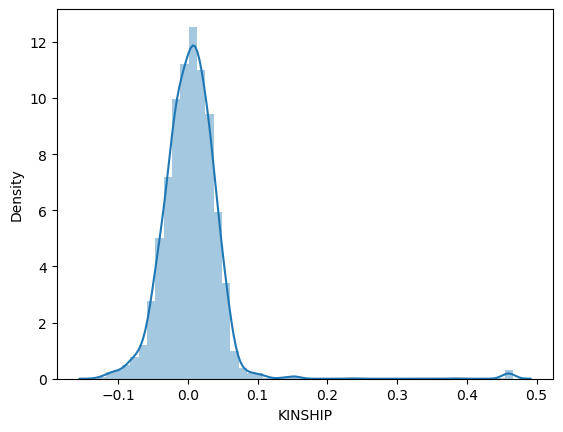

In [48]:
sns.distplot(relate["KINSHIP"])

In [49]:
%%bash
source ~/.bashrc
conda activate ipyrad
plink2 --vcf ../calls/kinfilter.recode.vcf --king-cutoff 0.1 --allow-extra-chr

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details
PLINK v2.00a2.3LM 64-bit Intel (24 Jan 2020)   www.cog-genomics.org/plink/2.0/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink2.log.
Options in effect:
  --allow-extra-chr
  --king-cutoff 0.1
  --vcf ../calls/kinfilter.recode.vcf

Start time: Fri Aug 25 11:20:54 2023
515300 MiB RAM detected; reserving 257650 MiB for main workspace.
Using up to 48 threads (change this with --threads).
--vcf: 12948 variants scanned.
--vcf: plink2-temporary.pgen + plink2-temporary.pvar + plink2-temporary.psam
written.
95 samples (0 females, 0 males, 95 ambiguous; 95 founders) loaded from
plink2-temporary.psam.
12948 variants loaded from plink2-temporary.pvar.
Note: No phenotype data present.
--king-cutoff pass 1/1: Scanning for rare variants... done.
0 variants h

In [55]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 1.0 --min-alleles 2 --max-alleles 2 \
    --maf 0.01 --keep plink2.king.cutoff.in.id \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/apal_imputation_panel_hifi_illumina_biallelic

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz
	--keep plink2.king.cutoff.in.id
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--min-alleles 2
	--minGQ 20
	--minQ 20
	--max-missing 1
	--out ../calls/apal_imputation_panel_hifi_illumina_biallelic
	--recode
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 79 out of 100 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 1556721 out of a possible 9962937 Sites
Run Time = 1012.00 seconds


In [56]:
%%bash
source ~/.bashrc
conda activate ipyrad
bgzip ../calls/apal_imputation_panel_hifi_illumina_biallelic.recode.vcf
tabix ../calls/apal_imputation_panel_hifi_illumina_biallelic.recode.vcf.gz

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details


In [ ]:
%%bash
source ~/.bashrc
conda activate beagle
bcftools annotate -S ./plink2.king.cutoff.in.id -S ^../testing_samples.txt \
    ../shapeit_phase/target.phased.bcf --remove "INFO" \
    | bcftools view -m2 -M2 -e 'COUNT(GT="AA")=N_SAMPLES || COUNT(GT="RR")=N_SAMPLES' \
    --targets-file ^../references/repeats.sorted.bed \
    | bcftools annotate --remove "INFO" | bcftools +fill-tags -- -t all \
    | bcftools view -e 'HWE<0.05 || ExcHet<0.05' -Ob -o ../shapeit_phase/target.phased_tagged.bcf
bcftools index ../shapeit_phase/target.phased_tagged.bcf
bcftools view ../shapeit_phase/target.phased_tagged.bcf | grep -v "^#" | wc -l

Lastly we want to exclude sites with abnormally high and low meanDP as these could be associated with regions that are CNV variants, which will mess with phasing and imputation:

In [82]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina_biallelic.recode.vcf.gz \
    --site-mean-depth

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina_biallelic.recode.vcf.gz
	--site-mean-depth

Using zlib version: 1.2.11
After filtering, kept 79 out of 79 Individuals
Outputting Depth for Each Site
After filtering, kept 1556721 out of a possible 1556721 Sites
Run Time = 33.00 seconds


/tmp/ipykernel_1886521/694204872.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(depth["MEAN_DEPTH"], bins = 2000)


9.31015 18.6203 27.93045


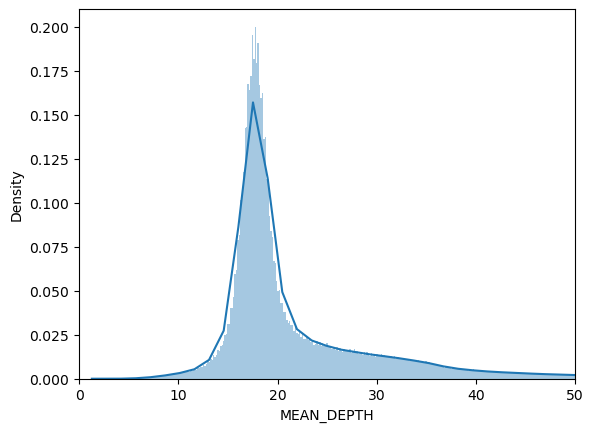

In [87]:
depth = pd.read_csv("./out.ldepth.mean", sep = "\t")
sns.distplot(depth["MEAN_DEPTH"], bins = 2000)
plt.xlim(0,50)
print(depth["MEAN_DEPTH"].median()*.5, depth["MEAN_DEPTH"].median(), depth["MEAN_DEPTH"].median()*1.5)

In [93]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz \
    --site-mean-depth

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz
	--site-mean-depth

Using zlib version: 1.2.11
After filtering, kept 100 out of 100 Individuals
Outputting Depth for Each Site
After filtering, kept 9962937 out of a possible 9962937 Sites
Run Time = 225.00 seconds


In [82]:
!cat ../BE.txt

SRR7236015
SRR7236016
SRR7236017
SRR7236018
SRR7236019
SRR7236020


In [87]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --min-alleles 2 --max-alleles 2 --thin 20000 \
    --maf 0.05 --remove-indels --keep ../FL.txt \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/kinfilter

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel.vcf.gz
	--keep ../FL.txt
	--recode-INFO-all
	--maf 0.05
	--max-alleles 2
	--min-alleles 2
	--minGQ 20
	--thin 20000
	--minQ 20
	--out ../calls/kinfilter
	--recode
	--remove-indels
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 127 out of 176 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 13528 out of a possible 9737242 Sites
Run Time = 1119.00 seconds


/tmp/ipykernel_1886521/694204872.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(depth["MEAN_DEPTH"], bins = 2000)


8.82445 17.6489 26.473350000000003


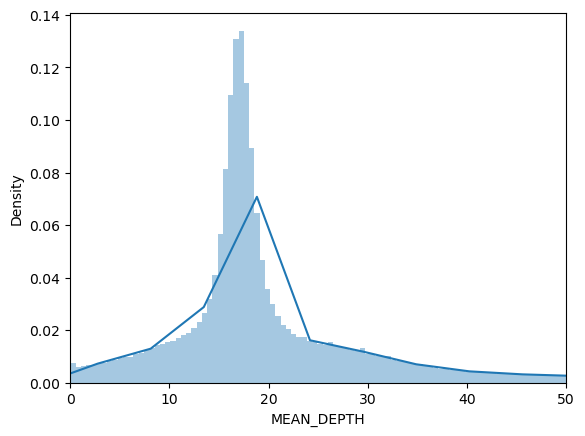

In [94]:
depth = pd.read_csv("./out.ldepth.mean", sep = "\t")
sns.distplot(depth["MEAN_DEPTH"], bins = 2000)
plt.xlim(0,50)
print(depth["MEAN_DEPTH"].median()*.5, depth["MEAN_DEPTH"].median(), depth["MEAN_DEPTH"].median()*1.5)

In [92]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 0.9 --min-alleles 2 --max-alleles 2 \
    --min-meanDP 9 --max-meanDP 28 \
    --maf 0.01 --keep plink2.king.cutoff.in.id \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/apal_imputation_panel_hifi_illumina_biallelic

ERROR: This cross-compiler package contains no program /storage/group/ibb3/default/.conda/envs/ipyrad/bin/x86_64-conda_cos6-linux-gnu-cc
ERROR: activate-gcc_linux-64.sh failed, see above for details



VCFtools - 0.1.16
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz
	--keep plink2.king.cutoff.in.id
	--recode-INFO-all
	--maf 0.01
	--max-alleles 2
	--max-meanDP 28
	--min-alleles 2
	--minGQ 20
	--min-meanDP 9
	--minQ 20
	--max-missing 0.9
	--out ../calls/apal_imputation_panel_hifi_illumina_biallelic
	--recode
	--exclude-bed ../references/repeats_and_cnv_sorted_merged.bed

Using zlib version: 1.2.11
Keeping individuals in 'keep' list
After filtering, kept 79 out of 100 Individuals
Outputting VCF file...
	Read 218633 BED file entries.
After filtering, kept 3036678 out of a possible 9962937 Sites
Run Time = 1173.00 seconds


In [89]:
%%bash
source ~/.bashrc
conda activate ipyrad
bgzip ../calls/apal_imputation_panel_hifi_illumina_biallelic.recode.vcf
tabix ../calls/apal_imputation_panel_hifi_illumina_biallelic.recode.vcf.gz

Process is interrupted.


In [ ]:
%%bash
source ~/.bashrc
conda activate ipyrad
vcftools --gzvcf ../calls/apal_imputation_panel_hifi_illumina.vcf.gz \
    --minGQ 20 --minQ 20 --recode-INFO-all \
    --max-missing 0.9 --min-alleles 2 --max-alleles 2 \
    --min-meanDP 9 --max-meanDP 28 \
    --maf 0.05 --keep plink2.king.cutoff.in.id \
    --exclude-bed ../references/repeats_and_cnv_sorted_merged.bed \
    --recode --out ../calls/apal_imputation_panel_hifi_illumina_biallelic

In [110]:
!grep "A22089" keep_ids.txt

A22089


In [107]:
!grep "A22152" plink2.king.cutoff.in.id

A22152


In [84]:
!cat ../JM.txt

J1_kenkel
J2_kenkel
J3_kenkel
J4_kenkel
J5_kenkel
